In [82]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil


data = 30


In [83]:
with open("workspace_2.json") as wksp:

    spec = json.load(wksp)

    workspace = pyhf.Workspace(spec)



In [84]:
model = workspace.model(poi_name="muFCNC")  # background-only!

model.config.modifiers

[('hesse_err', 'staterror'), ('muFCNC', 'normfactor')]

In [85]:
init_pars = model.config.suggested_init()
model.expected_actualdata(init_pars)


array([42.55])

In [93]:
model.config.poi_name

'muFCNC'

In [86]:
model.config.poi_index

0

In [87]:
bkgd_pars = init_pars
bkgd_pars[1] = 0.0

In [88]:
model.expected_actualdata(bkgd_pars)

array([22.26])

In [89]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    0.0,  # null hypothesis
    [50] + model.config.auxdata,
    model,
    test_stat="q",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.
qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.


      Observed CLs: 1.0000
Expected CLs(-2 σ): 1.0000
Expected CLs(-1 σ): 1.0000
Expected CLs( 0 σ): 1.0000
Expected CLs( 1 σ): 1.0000
Expected CLs( 2 σ): 1.0000


In [90]:
observations = [data]+model.config.auxdata
poi_values = np.linspace(0, 1.99, 200)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

/Users/haoweizheng/miniforge3/envs/tf/lib/python3.8/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


Upper limit (obs): μ = 0.8882
Upper limit (exp): μ = 0.4569


Text(0.5, 0, 'Branching Ratio for tcH')

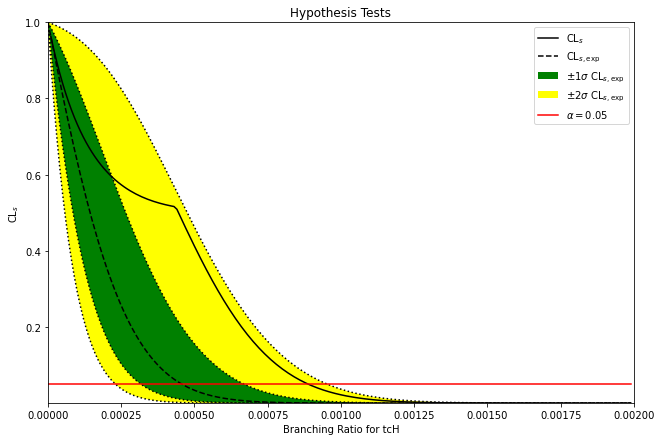

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")
artists = brazil.plot_results(poi_values*0.001, results, ax=ax)
ax.set_xlim(0, 0.002)
ax.set_ylim(0.001, 1)
ax.set_xlabel("Branching Ratio for tcH")
#ax.set_yscale("log")

In [92]:
model.spec



{'channels': [{'name': 'channel1',
   'samples': [{'data': [22.26],
     'modifiers': [{'data': None, 'name': 'muFCNC', 'type': 'normfactor'}],
     'name': 'signal'},
    {'data': [20.29],
     'modifiers': [{'name': 'hesse_err', 'type': 'staterror', 'data': [0.25]}],
     'name': 'background'}]}],
 'parameters': []}